# Explore here

In [41]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV


import joblib

In [42]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
#Conocimiento del dataset
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
#Mirar si hay duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


In [45]:
#Mirar si hay nulos
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [46]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies	
Glucose	
BloodPressure	
SkinThickness	
Insulin	
BMI	
DiabetesPedigreeFunction	
Age	
Outcome

### Análisis univariante

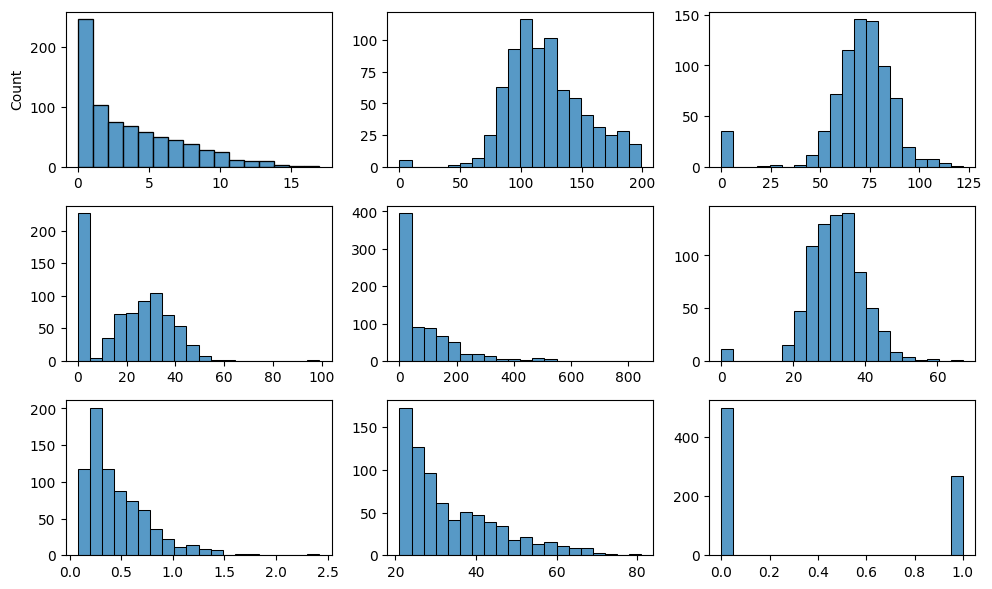

In [47]:
fig, axis = plt.subplots(3, 3, figsize = (10, 6), gridspec_kw={'height_ratios': [3, 3, 3]})
sns.histplot(ax=axis[0, 0], data=df, x="Pregnancies").set(xlabel= None)
sns.histplot(ax=axis[0, 1], data=df, x="Glucose", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x="BloodPressure", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x="SkinThickness", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[1, 1], data=df, x="Insulin", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x="BMI", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[2, 0], data=df, x="DiabetesPedigreeFunction", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x="Age", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[2, 2], data=df, x="Outcome", bins=20).set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()


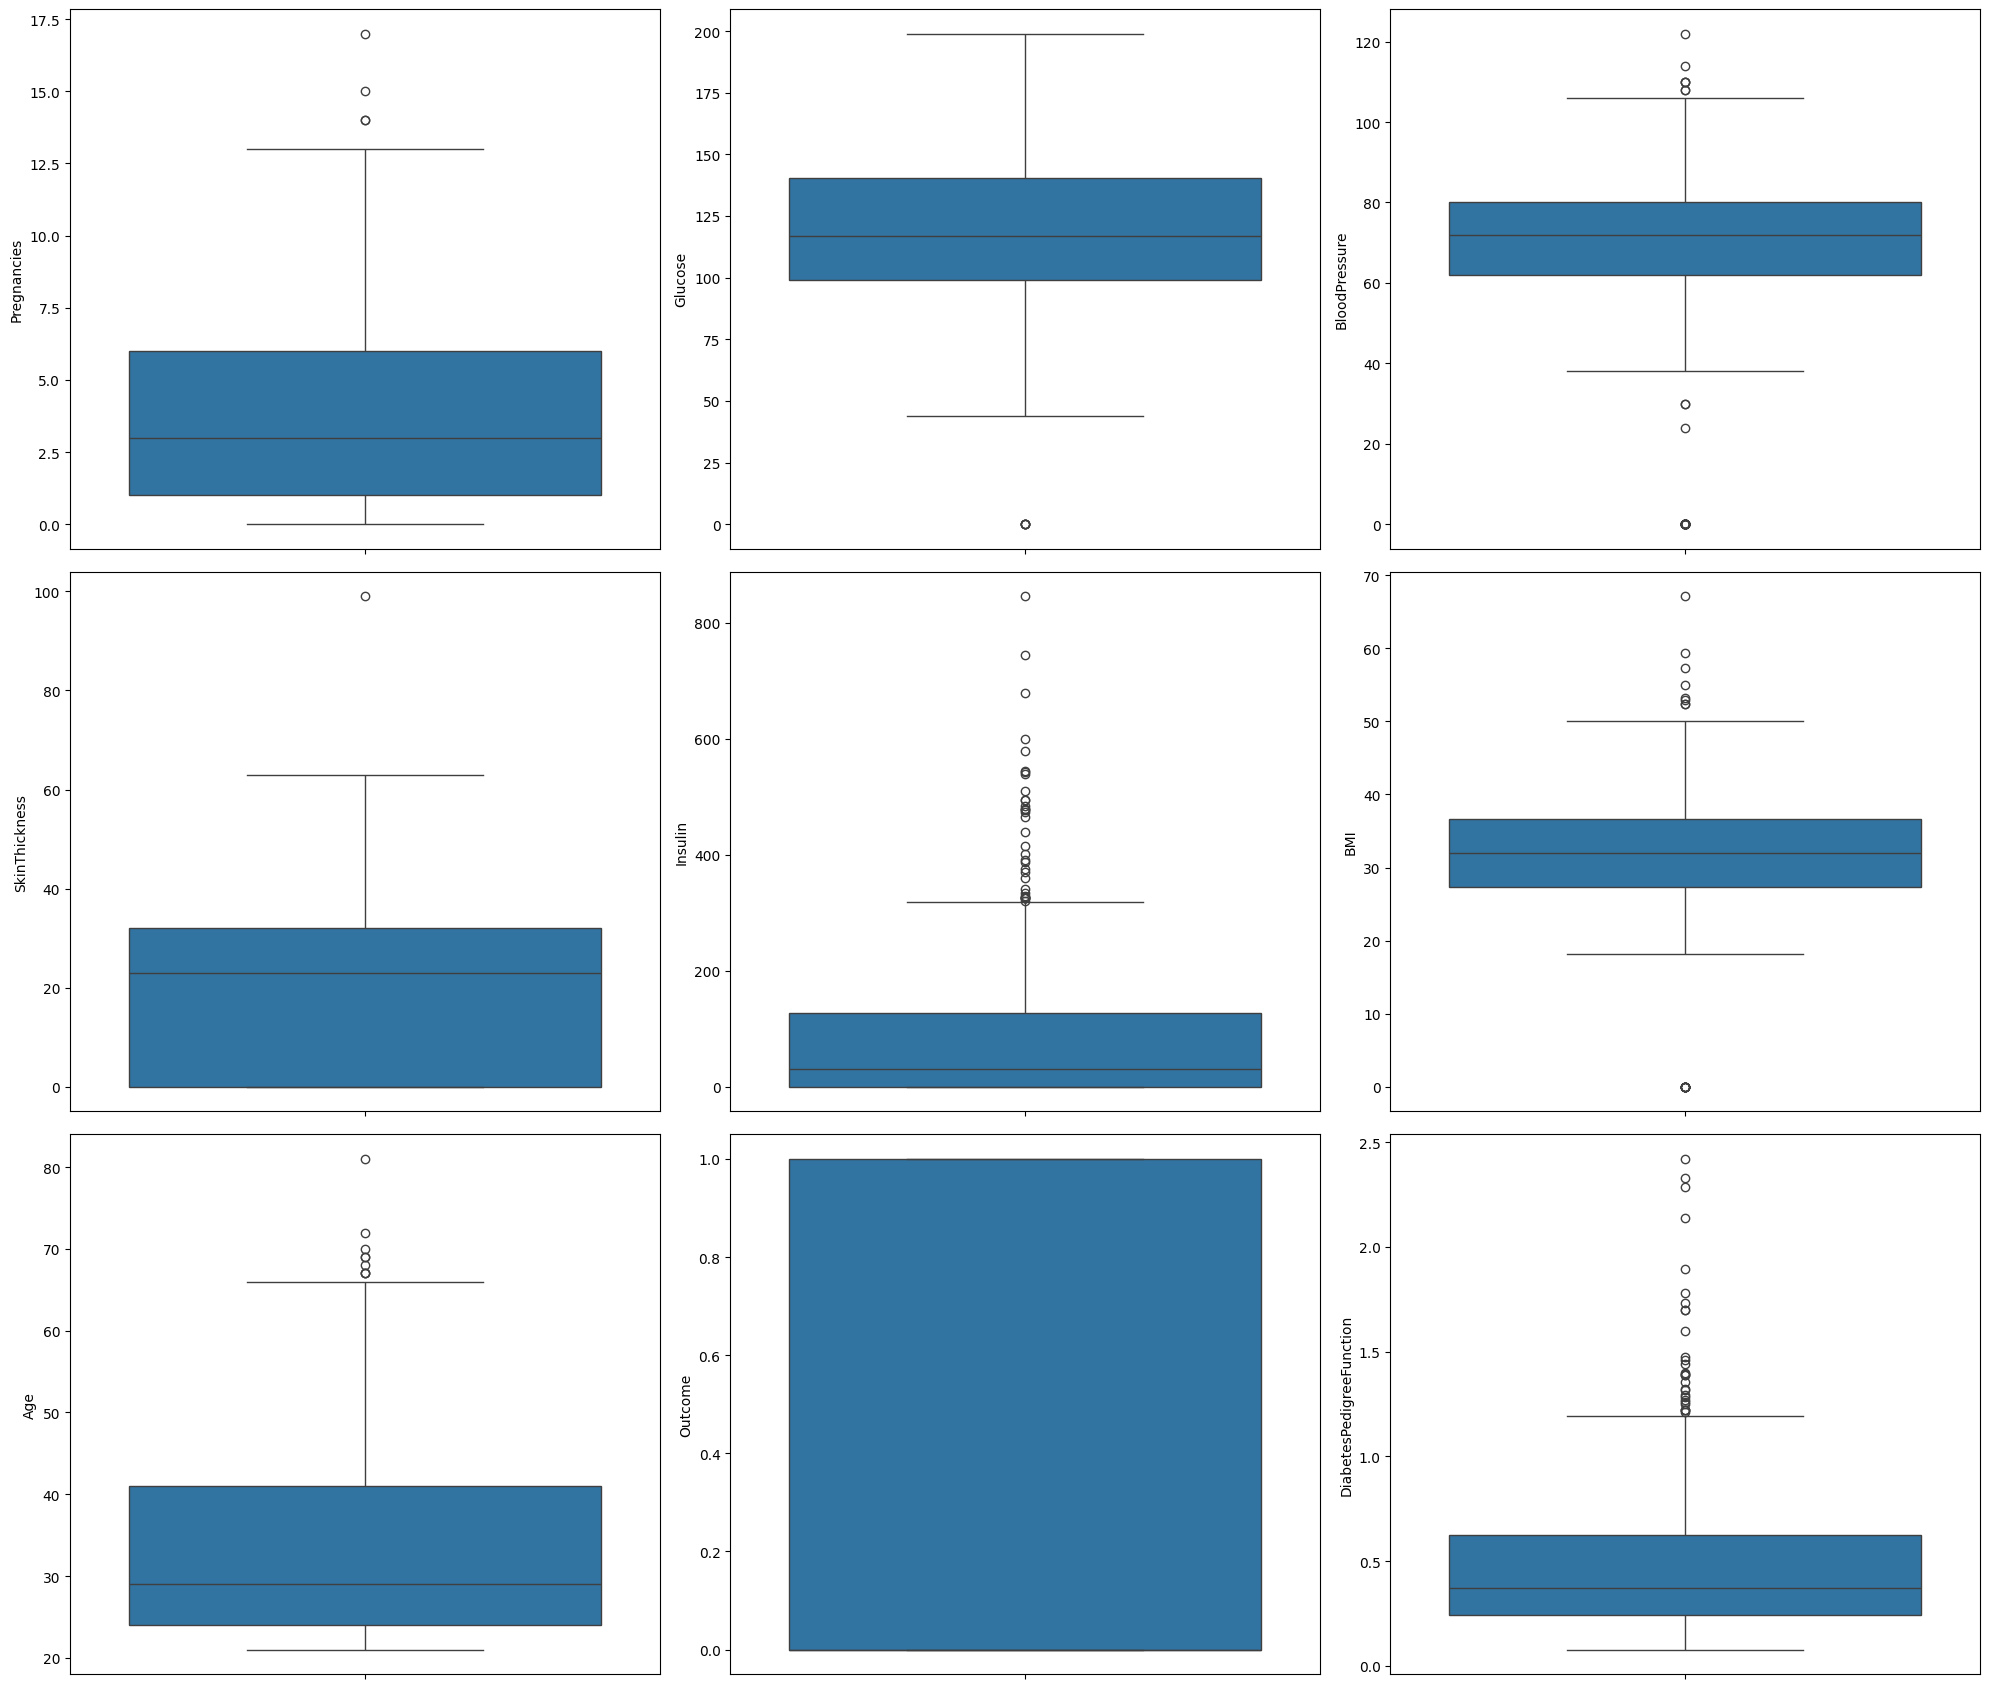

In [48]:
fig, axis = plt.subplots(3, 3, figsize = (20, 17))

sns.boxplot(ax = axis[0, 0], data = df, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = df, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = df, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = df, y = "SkinThickness")
sns.boxplot(ax = axis[1, 1], data = df, y = "Insulin")
sns.boxplot(ax = axis[1, 2], data = df, y = "BMI")
sns.boxplot(ax = axis[2, 0], data = df, y = "Age")
sns.boxplot(ax = axis[2, 1], data = df, y = "Outcome")
sns.boxplot(ax = axis[2, 2], data = df, y = "DiabetesPedigreeFunction")



plt.tight_layout()

plt.show()

### Análisis multivariante

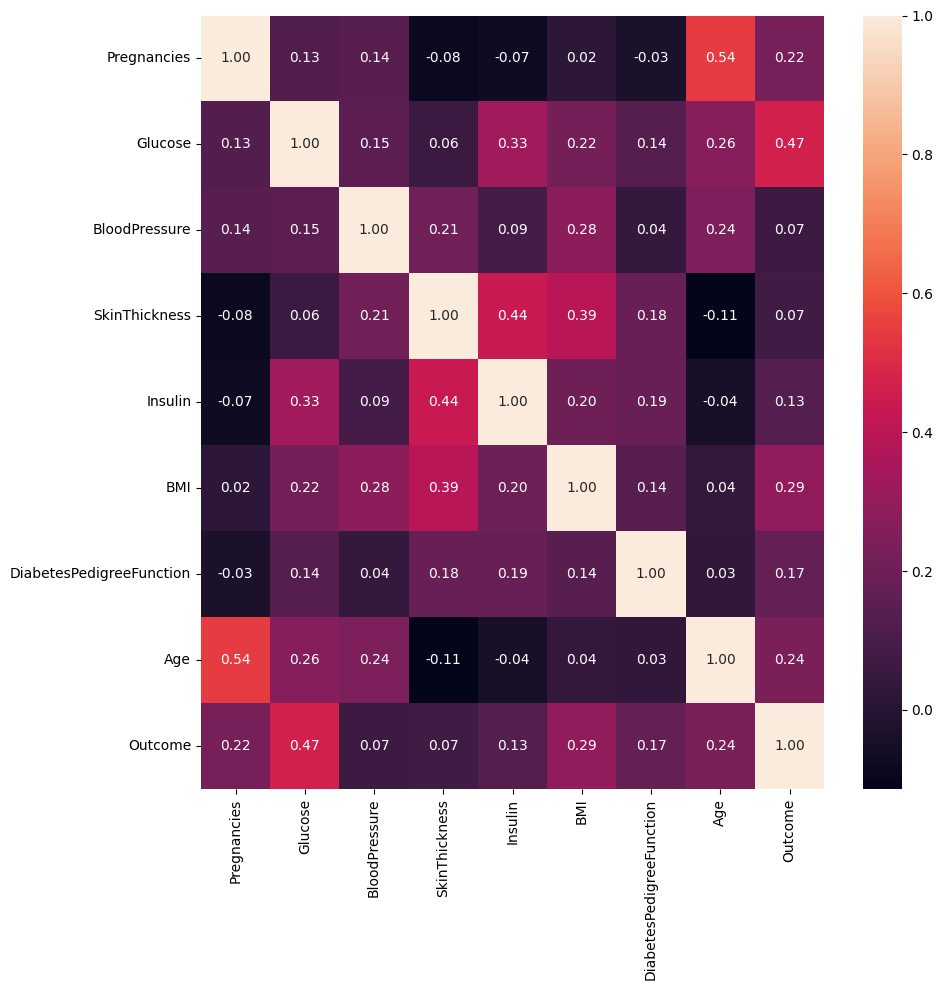

In [49]:
#correlaciones todo con todo antes del filtrado
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

In [50]:
df = df[(df['Glucose'] >= 50) & 
        (df['Pregnancies'] <= 12 ) & 
        (df['BloodPressure'] >= 40) & 
        (df['Insulin'] <= 300) & 
        (df['BMI'].between(10, 60)) &
        (df['DiabetesPedigreeFunction'].between(0, 2.5))]

In [51]:
df.shape

(668, 9)

La disminución del datset es del 13%, es decir, después del diltrado se han eliminado el 13% de las filas, en dataset médico vale la pena que sean eliminadas si las cuales corresponden a valores fisiológicamente imposibles. 

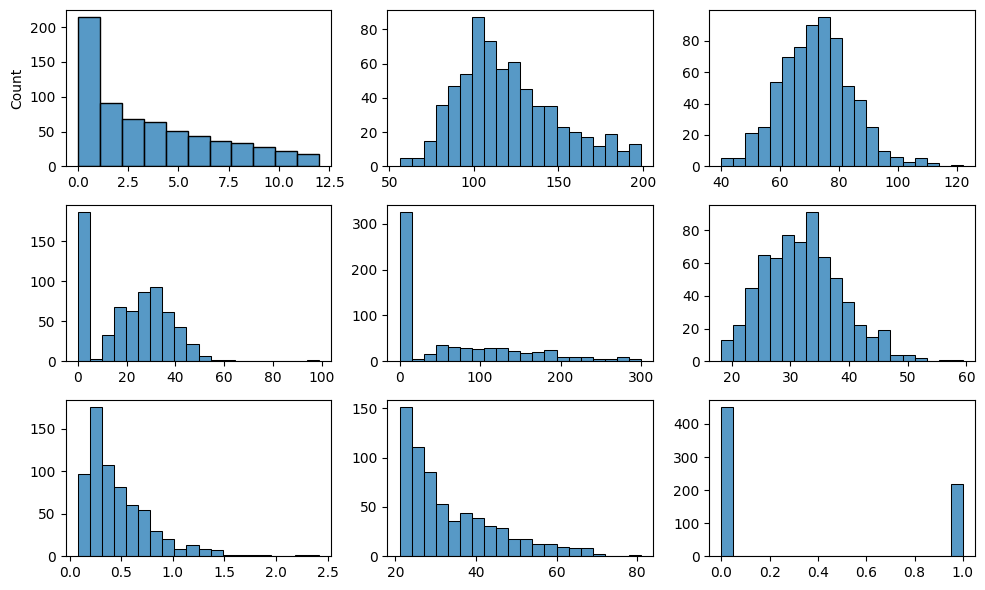

In [52]:
fig, axis = plt.subplots(3, 3, figsize = (10, 6), gridspec_kw={'height_ratios': [3, 3, 3]})
sns.histplot(ax=axis[0, 0], data=df, x="Pregnancies").set(xlabel= None)
sns.histplot(ax=axis[0, 1], data=df, x="Glucose", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[0, 2], data=df, x="BloodPressure", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[1, 0], data=df, x="SkinThickness", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[1, 1], data=df, x="Insulin", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[1, 2], data=df, x="BMI", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[2, 0], data=df, x="DiabetesPedigreeFunction", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[2, 1], data=df, x="Age", bins=20).set(xlabel=None, ylabel=None)
sns.histplot(ax=axis[2, 2], data=df, x="Outcome", bins=20).set(xlabel=None, ylabel=None)

plt.tight_layout()
plt.show()


Esto comprueba:
- Por un lado, que el filtrado no esta sesgando los datos, ya que la concentración de filas eliminadas es similar en los dos grupos, diabéticos y no diabéticos.
- Por otro lado la variable SkinThikness y Insulin siguen teniendo muchos valores en cero. Estos 0 los vamos a tomar no como valores reales, sino cómo un valor que indica que no se tomaron estas medidas, debido a las estadísticas que se muestran y la clara discontinuïdad que hay entre los 0 y el resto de valores. Por lo tanto, para tratar estos datos se pasaran a valores nulos y se van a imputar por mediana según Outcome.

In [53]:
#Imputar datos de SkinThickness y Insulin que son 0
cols_to_nan = ['SkinThickness', 'Insulin']
df[cols_to_nan] = df[cols_to_nan].replace(0, np.nan)
for col in ['SkinThickness', 'Insulin']:
    df[col] = df.groupby('Outcome')[col].transform(lambda x: x.fillna(x.median()))
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,3.694611,119.964072,72.541916,28.841317,122.306886,32.194910,0.470596,33.143713,0.326347
std,3.125966,29.797093,11.850634,8.997849,52.009457,6.705294,0.323647,11.754243,0.469227
min,0.000000,56.000000,40.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,24.750000,95.000000,27.300000,0.245000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,27.000000,95.000000,32.000000,0.374500,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,159.000000,36.125000,0.626250,40.000000,1.000000
max,12.000000,199.000000,122.000000,99.000000,300.000000,59.400000,2.420000,81.000000,1.000000


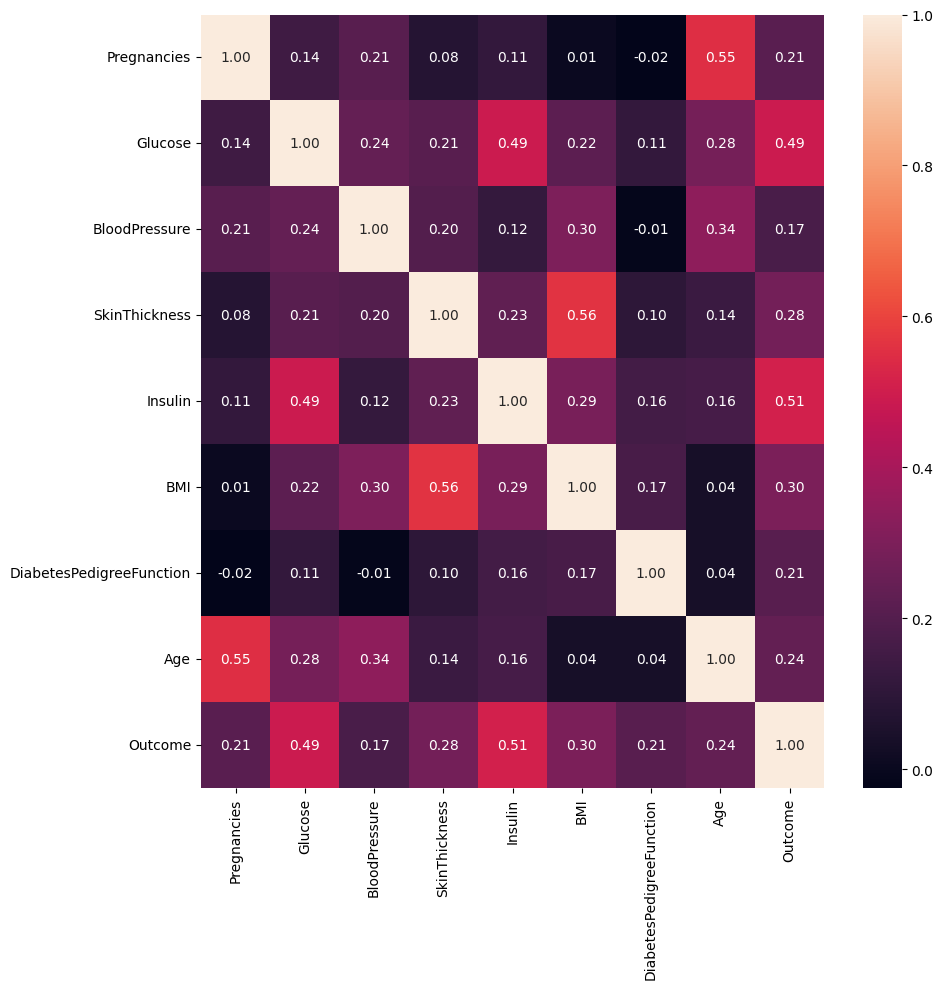

In [54]:
#Miramos otra vez las correlaciones
fig, axis = plt.subplots(figsize = (10, 10))

sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

El análisis muestra que las variables con mayor influencia en ser o no ser diabético son: Insulina, Glucosa y BMI.
En menor mesura: Skinthickness, Age y Pregnancies y DiabetesPedigríFunction.
Como la variable objetivo Outcome es binaria, estamos ante un problema de clasificación binaria. Además, como para este proyecto en concreto sabemos que tenemos que usar un árbol de decisión, no se van a escalar las variables. Tampoco se hace codificación porque todos las variables son numéricas.

### Ingeniería de atributos

In [55]:
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
276,7,106,60,24.0,159.0,26.5,0.296,29
464,10,115,98,27.0,95.0,24.0,1.022,34
693,7,129,68,49.0,125.0,38.5,0.439,43
74,1,79,75,30.0,95.0,32.0,0.396,22
169,3,111,90,12.0,78.0,28.4,0.495,29


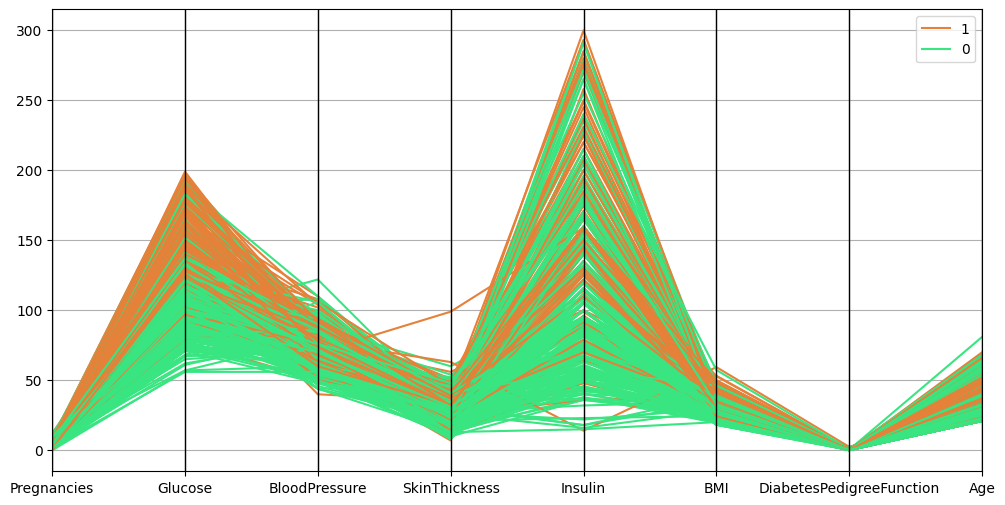

In [56]:
total_data = X.copy()  # se hace una copia para no modificar el dataframe original
total_data["Outcome"] = y

import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

plt.figure(figsize=(12,6))
parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581"))
plt.show()

In [57]:
#Selección de características
selection_model = SelectKBest(score_func = mutual_info_classif, k = 6)
X_train_selected = selection_model.fit_transform(X_train, y_train)
X_test_selected = selection_model.transform(X_test)

# Nombre de las columnas seleccionadas
ix = selection_model.get_support()
selected_features = X_train.columns[ix]
print("Variables seleccionadas:", list(selected_features))

Variables seleccionadas: ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']


#### Modelado Árbol de clasificación

In [58]:
model = DecisionTreeClassifier(random_state = 42, max_depth = 10)

# entrenamiento
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [59]:
#predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1])

In [60]:
y_pred_train = model.predict(X_train)
y_pred_train

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [61]:
#métricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7835820895522388
F1 score Test:  0.7835820895522388
Precision Test:  0.7835820895522388
Recall Test:  0.7835820895522388
Accuracy Train:  0.99812734082397
F1 score Train:  0.99812734082397
Precision Train:  0.99812734082397
Recall Train:  0.99812734082397


In [62]:
#modelo con datos seleccionados kbest
model = DecisionTreeClassifier(random_state = 42)

# entrenamiento
model.fit(X_train_selected, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [63]:
#predicción
y_pred_test = model.predict(X_test_selected)
y_pred_test

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1])

In [64]:
y_pred_train = model.predict(X_train_selected)
y_pred_train

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,

In [65]:
#métricas con datos seleccionados kbest
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.8059701492537313
F1 score Test:  0.8059701492537313
Precision Test:  0.8059701492537313
Recall Test:  0.8059701492537313
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


El modelo muestra claramente overfitting, tanto usando los datos sin selección como los datos con selección, debido al alto valor coincidente en las métricas y a la diferencia entre el 99.8% del train respecto al test. 
Se va a aplicar regularización a partir de cambio en los hiperparámetros para reducir el sobreajuste.

#### Comparación de pureza con Gini vs Entropy

In [66]:
# Árbol ajustado con hiperparámetros con datos seleccionados kbest - Gini
tree_model_selected_gini = DecisionTreeClassifier(
    max_depth=4,          
    min_samples_split=10, 
    min_samples_leaf=5,   
    random_state=42
)

tree_model_selected_gini.fit(X_train_selected, y_train)

y_train_pred_gini = tree_model_selected_gini.predict(X_train_selected)
y_test_pred_gini = tree_model_selected_gini.predict(X_test_selected)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_gini))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_gini))
print("Test F1:", f1_score(y_test, y_test_pred_gini))
print("Test Precision:", precision_score(y_test, y_test_pred_gini))
print("Test Recall:", recall_score(y_test, y_test_pred_gini))

Train Accuracy: 0.9176029962546817
Test Accuracy: 0.8208955223880597
Test F1: 0.7777777777777778
Test Precision: 0.6885245901639344
Test Recall: 0.8936170212765957


In [ ]:
# Árbol ajustado con hiperparámetros con datos seleccionados kbest - Entropy
tree_model_selected_entropy = DecisionTreeClassifier(
    criterion= 'entropy',
    max_depth=4,          
    min_samples_split=10, 
    min_samples_leaf=5,   
    random_state=42
)

tree_model_selected_entropy.fit(X_train_selected, y_train)

y_train_pred_entropy = tree_model_selected_entropy.predict(X_train_selected)
y_test_pred_entropy = tree_model_selected_entropy.predict(X_test_selected)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred_entropy))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_entropy))
print("Test F1:", f1_score(y_test, y_test_pred_entropy))
print("Test Precision:", precision_score(y_test, y_test_pred_entropy))
print("Test Recall:", recall_score(y_test, y_test_pred_entropy))

Train Accuracy: 0.9119850187265918
Test Accuracy: 0.8208955223880597
Test F1: 0.7777777777777778
Test Precision: 0.6885245901639344
Test Recall: 0.8936170212765957


,Criterio,Train Accuracy,Test Accuracy,F1,Precision,Recall
0,Gini,0.917603,0.820896,0.777778,0.688525,0.893617
1,Entropy,0.911985,0.820896,0.777778,0.688525,0.893617


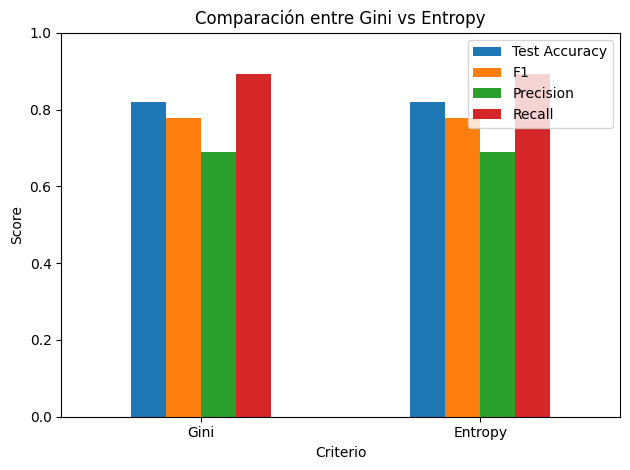

In [68]:
#Tabla de resultados
resultados = pd.DataFrame({
    'Criterio': ['Gini', 'Entropy'],
    'Train Accuracy': [
        accuracy_score(y_train, y_train_pred_gini),
        accuracy_score(y_train, y_train_pred_entropy)
    ],
    'Test Accuracy': [
        accuracy_score(y_test, y_test_pred_gini),
        accuracy_score(y_test, y_test_pred_entropy)
    ],
    'F1': [
        f1_score(y_test, y_test_pred_gini),
        f1_score(y_test, y_test_pred_entropy)
    ],
    'Precision': [
        precision_score(y_test, y_test_pred_gini),
        precision_score(y_test, y_test_pred_entropy)
    ],
    'Recall': [
        recall_score(y_test, y_test_pred_gini),
        recall_score(y_test, y_test_pred_entropy)
    ]
})
display(resultados)

#Gráfico comparativo
resultados.set_index("Criterio")[["Test Accuracy", "F1", "Precision", "Recall"]].plot(kind="bar")
plt.title("Comparación entre Gini vs Entropy")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Dado que ambos modelos generalizan igual de bien, de momento se puede mantener el árbol entrenado con el criterio Gini como modelo base, priorizando su eficiencia computacional.

#### Regularización manual

In [69]:
# Árbol ajustado con hiperparámetros manual
tree = DecisionTreeClassifier(
    max_depth=4,          
    min_samples_split=10, 
    min_samples_leaf=5,   
    random_state=42
)

tree.fit(X_train, y_train)

y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1:", f1_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred))
print("Test Recall:", recall_score(y_test, y_test_pred))

Train Accuracy: 0.9138576779026217
Test Accuracy: 0.8134328358208955
Test F1: 0.7663551401869159
Test Precision: 0.6833333333333333
Test Recall: 0.8723404255319149


#### Regularización con GridSearch

In [ ]:
tree = DecisionTreeClassifier(random_state=42)

# Fijar hiperparámetros para validación cruzada
param_grid = {
    'criterion': ['gini', 'entropy'],      
    'max_depth': [2, 3, 4, 5, 6, None],    
    'min_samples_split': [2, 5, 10, 20],   
    'min_samples_leaf': [1, 2, 5, 10]      
}
# Configuramos GridSearchCV
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='accuracy',        
    cv=5
)
# Entrenar la búsqueda en los datos seleccionados
grid_search.fit(X_train_selected, y_train)

# Mejores hiperparámetros
print("=== Mejores hiperparámetros encontrados ===")
print(grid_search.best_params_)
print(f"Mejor accuracy (CV): {grid_search.best_score_:.4f}")

# Mejor modelo
best_tree = grid_search.best_estimator_

# Predicciones y métricas en train
y_train_pred_best = best_tree.predict(X_train_selected)

print("\n=== Rendimiento del mejor modelo en TRAIN ===")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_best))
print("Train F1:", f1_score(y_train, y_train_pred_best))
print("Train Precision:", precision_score(y_train, y_train_pred_best))
print("Train Recall:", recall_score(y_train, y_train_pred_best))

# Predicciones y métricas en test
y_test_pred_best = best_tree.predict(X_test_selected)

print("\n=== Rendimiento del mejor modelo en TEST ===")
print("Accuracy:", accuracy_score(y_test, y_test_pred_best))
print("F1:", f1_score(y_test, y_test_pred_best))
print("Precision:", precision_score(y_test, y_test_pred_best))
print("Recall:", recall_score(y_test, y_test_pred_best))
print(classification_report(y_test, y_test_pred_best, digits=3))


=== Mejores hiperparámetros encontrados ===
{'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mejor accuracy (CV): 0.8726

=== Rendimiento del mejor modelo en TRAIN ===
Train Accuracy: 0.9288389513108615
Train F1: 0.8914285714285715
Train Precision: 0.8715083798882681
Train Recall: 0.9122807017543859

=== Rendimiento del mejor modelo en test ===
Accuracy: 0.8283582089552238
F1: 0.7850467289719626
Precision: 0.7
Recall: 0.8936170212765957
              precision    recall  f1-score   support

           0      0.932     0.793     0.857        87
           1      0.700     0.894     0.785        47

    accuracy                          0.828       134
   macro avg      0.816     0.843     0.821       134
weighted avg      0.851     0.828     0.832       134



#### Conclusión
Basándonos en las métricas resultantes, el mejor modelo final es el árbol regularizado con GridSearchCV con previa selección de características.

Al aplicar regularización con GridSearch y selección de características con K-best, se obtuvo un árbol de decisión que generaliza mejor, con métricas de test superiores y menos sobreajuste.

Este modelo es adecuado para predecir Outcome en pacientes, captura la mayoría de casos positivos y mantiene un nivel razonable de precisión, siendo robusto y más interpretable que el árbol original sin regularizar ni seleccionar características.


#### Guardado de datos

In [71]:
#Guardar los datos limpios para el siguiente proyecto
X_train_df = pd.DataFrame(X_train_selected)
X_test_df = pd.DataFrame(X_test_selected)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

X_train_df.to_csv('X_train.csv', index=False)
X_test_df.to_csv('X_test.csv', index=False)
y_train_df.to_csv('y_train.csv', index=False)
y_test_df.to_csv('y_test.csv', index=False)
import pickle

with open('dataset.pkl', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)


#### Guardado del modelo

In [72]:
joblib.dump(best_tree, '/workspaces/kiliangil-Prediciendo-la-diabetes/models/mejor_modelo_tree.pkl')
print("Modelo guardado correctamente como 'mejor_modelo_tree.pkl'")

Modelo guardado correctamente como 'mejor_modelo_tree.pkl'
